# Четвёртая лабораторная. Задача Классификации

## Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

```
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
```

In [1]:
import pandas as pd


In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]
df = pd.DataFrame(data, columns=['weather', 'stroll'])
df


,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [3]:
p_sunny = len(df.loc[df['weather'] == 'солнечно']) / len(df)
p_rain =  len(df.loc[df['weather'] == 'дождь']) / len(df)
p_snow = len(df.loc[df['weather'] == 'снег']) / len(df)
p_cloudly = len(df.loc[df['weather'] == 'облачно']) / len(df)

print(p_sunny, p_rain, p_snow, p_cloudly)

0.26666666666666666 0.2 0.26666666666666666 0.26666666666666666


In [4]:
p_stroll = len(df.loc[df['stroll'] == True]) / len(df)
p_not_stroll = len(df.loc[df['stroll'] == False]) / len(df)
print(p_stroll, p_not_stroll)

0.5333333333333333 0.4666666666666667


In [5]:
p_rainy_if_stroll = len(df.loc[(df['weather'] == 'дождь') & (df['stroll'] == True)]) / len(df.loc[df['stroll'] == True])
p_rainy_if_stroll

0.125

$P(yes|sunny) =\frac{P(yes) \cdot P(rainy | yes)}{P(rainy)}$ (1)

In [6]:
p_stroll_if_rainy = (p_stroll*p_rainy_if_stroll)/p_rain
p_stroll_if_rainy
# print(p_rain, p_stroll * p_rainy_if_stroll / p_rain)

0.3333333333333333

## Задание 2

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns

In [8]:
data = pd.read_csv('../data/smoke_detector_task.csv')
data.head(10)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,No
1,1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,No
2,2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,No
3,3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,No
4,4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,No
5,5,1654733336,20.073,54.12,0.0,400.0,12419.0,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,No
6,6,1654733337,20.088,53.61,0.0,400.0,12432.0,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,No
7,7,1654733338,20.103,53.20,0.0,400.0,12439.0,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,No
8,8,1654733339,20.117,52.81,0.0,400.0,12448.0,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,No
9,9,1654733340,20.132,52.46,0.0,400.0,12453.0,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,No


In [9]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62484 non-null  float64
 3   Humidity[%]     62383 non-null  float64
 4   TVOC[ppb]       62009 non-null  float64
 5   eCO2[ppm]       62305 non-null  float64
 6   Raw H2          62519 non-null  float64
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62603 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62313 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62378 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(4), object(1)
memory usage: 7.6+ MB


In [10]:
data = data.drop(['Unnamed: 0'], axis=1)


In [11]:
data.head(20)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.0,0.000,0.000,0,No
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.0,0.000,0.000,1,No
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.0,0.000,0.000,2,No
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.0,0.000,0.000,3,No
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.0,0.000,0.000,4,No
5,1654733336,20.073,54.12,0.0,400.0,12419.0,18998,939.725,0.00,0.00,0.0,0.000,0.000,5,No
6,1654733337,20.088,53.61,0.0,400.0,12432.0,19058,939.738,0.00,0.00,0.0,0.000,0.000,6,No
7,1654733338,20.103,53.20,0.0,400.0,12439.0,19114,939.758,0.00,0.00,0.0,0.000,0.000,7,No
8,1654733339,20.117,52.81,0.0,400.0,12448.0,19155,939.758,0.00,0.00,0.0,0.000,0.000,8,No
9,1654733340,20.132,52.46,0.0,400.0,12453.0,19195,939.756,0.90,3.78,0.0,4.369,2.780,9,No


Опишем столбцы:

- UTC - время когда был проведён эксперимент в секундах
- Temperature[C] - температура в Цельсиях
- Humidity[%] - влажность в процентах
- TVOC - индекс наличия ЛОС (летучих орган. соединений) (причиной увеличения TVOC может стать, например, сигаретный дым, приготовление пищи на кухне) (ppb - parts per billion)
- eCO2 - эквивалент углекислого газа (ppb)
- Raw H2 - необработанный водород
- Raw Ethanol - необработанный этанол
- Pressure[hPa] - давление к гектопаскалях (100 раз паскаля)
- PM1.0 - ультрадисперсные частицы размером менее 0,001 мкм
- PM2.5 - мельчайшие частицы размером от 0,001 до 2,5 мкм, которые незаметны без специальных приборов

- CNT - Обычный счётчик проб

## Предобработка данных (data preprocessing)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62484 non-null  float64
 2   Humidity[%]     62383 non-null  float64
 3   TVOC[ppb]       62009 non-null  float64
 4   eCO2[ppm]       62305 non-null  float64
 5   Raw H2          62519 non-null  float64
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62603 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62313 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62378 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 7.2+ MB


In [13]:
data.isna().sum().sort_values(ascending=False)

TVOC[ppb]         621
eCO2[ppm]         325
PM2.5             317
NC1.0             252
Humidity[%]       247
Temperature[C]    146
Raw H2            111
Pressure[hPa]      27
UTC                 0
Raw Ethanol         0
PM1.0               0
NC0.5               0
NC2.5               0
CNT                 0
Fire Alarm          0
dtype: int64

In [14]:
mean_group = ["TVOC[ppb]", "eCO2[ppm]", "PM2.5", 
              "NC1.0", "Humidity[%]", "Temperature[C]",
                "Raw H2", "Pressure[hPa]"]

for field in mean_group:
    data[field] = data[field].fillna(data[field].mean()) # mediana при int


In [15]:
data.isna().sum().sort_values(ascending=False)

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [16]:
data.duplicated().value_counts()

False    62630
dtype: int64

Следовательно, дубликатов нет

In [17]:
dict_firealarm = {"Yes": True, "No": False}
data["Fire Alarm"] = data["Fire Alarm"].map(dict_firealarm)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  float64
 4   eCO2[ppm]       62630 non-null  float64
 5   Raw H2          62630 non-null  float64
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  bool   
dtypes: bool(1), float64(11), int64(3)
memory usage: 6.7 MB


Выкинем UTC время, потому что нет никакой технической связи между ним и срабатыванием противопожарной сигнализации.

In [19]:
data = data.drop('UTC', axis=1)
data

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,False
1,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,False
2,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,False
3,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,False
4,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,False
62626,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,False
62627,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,False
62628,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,False


## EDA

### Нахождение и удаление выбросов

array([[<AxesSubplot: title={'center': 'Temperature[C]'}>,
        <AxesSubplot: title={'center': 'Humidity[%]'}>,
        <AxesSubplot: title={'center': 'TVOC[ppb]'}>,
        <AxesSubplot: title={'center': 'eCO2[ppm]'}>],
       [<AxesSubplot: title={'center': 'Raw H2'}>,
        <AxesSubplot: title={'center': 'Raw Ethanol'}>,
        <AxesSubplot: title={'center': 'Pressure[hPa]'}>,
        <AxesSubplot: title={'center': 'PM1.0'}>],
       [<AxesSubplot: title={'center': 'PM2.5'}>,
        <AxesSubplot: title={'center': 'NC0.5'}>,
        <AxesSubplot: title={'center': 'NC1.0'}>,
        <AxesSubplot: title={'center': 'NC2.5'}>],
       [<AxesSubplot: title={'center': 'CNT'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

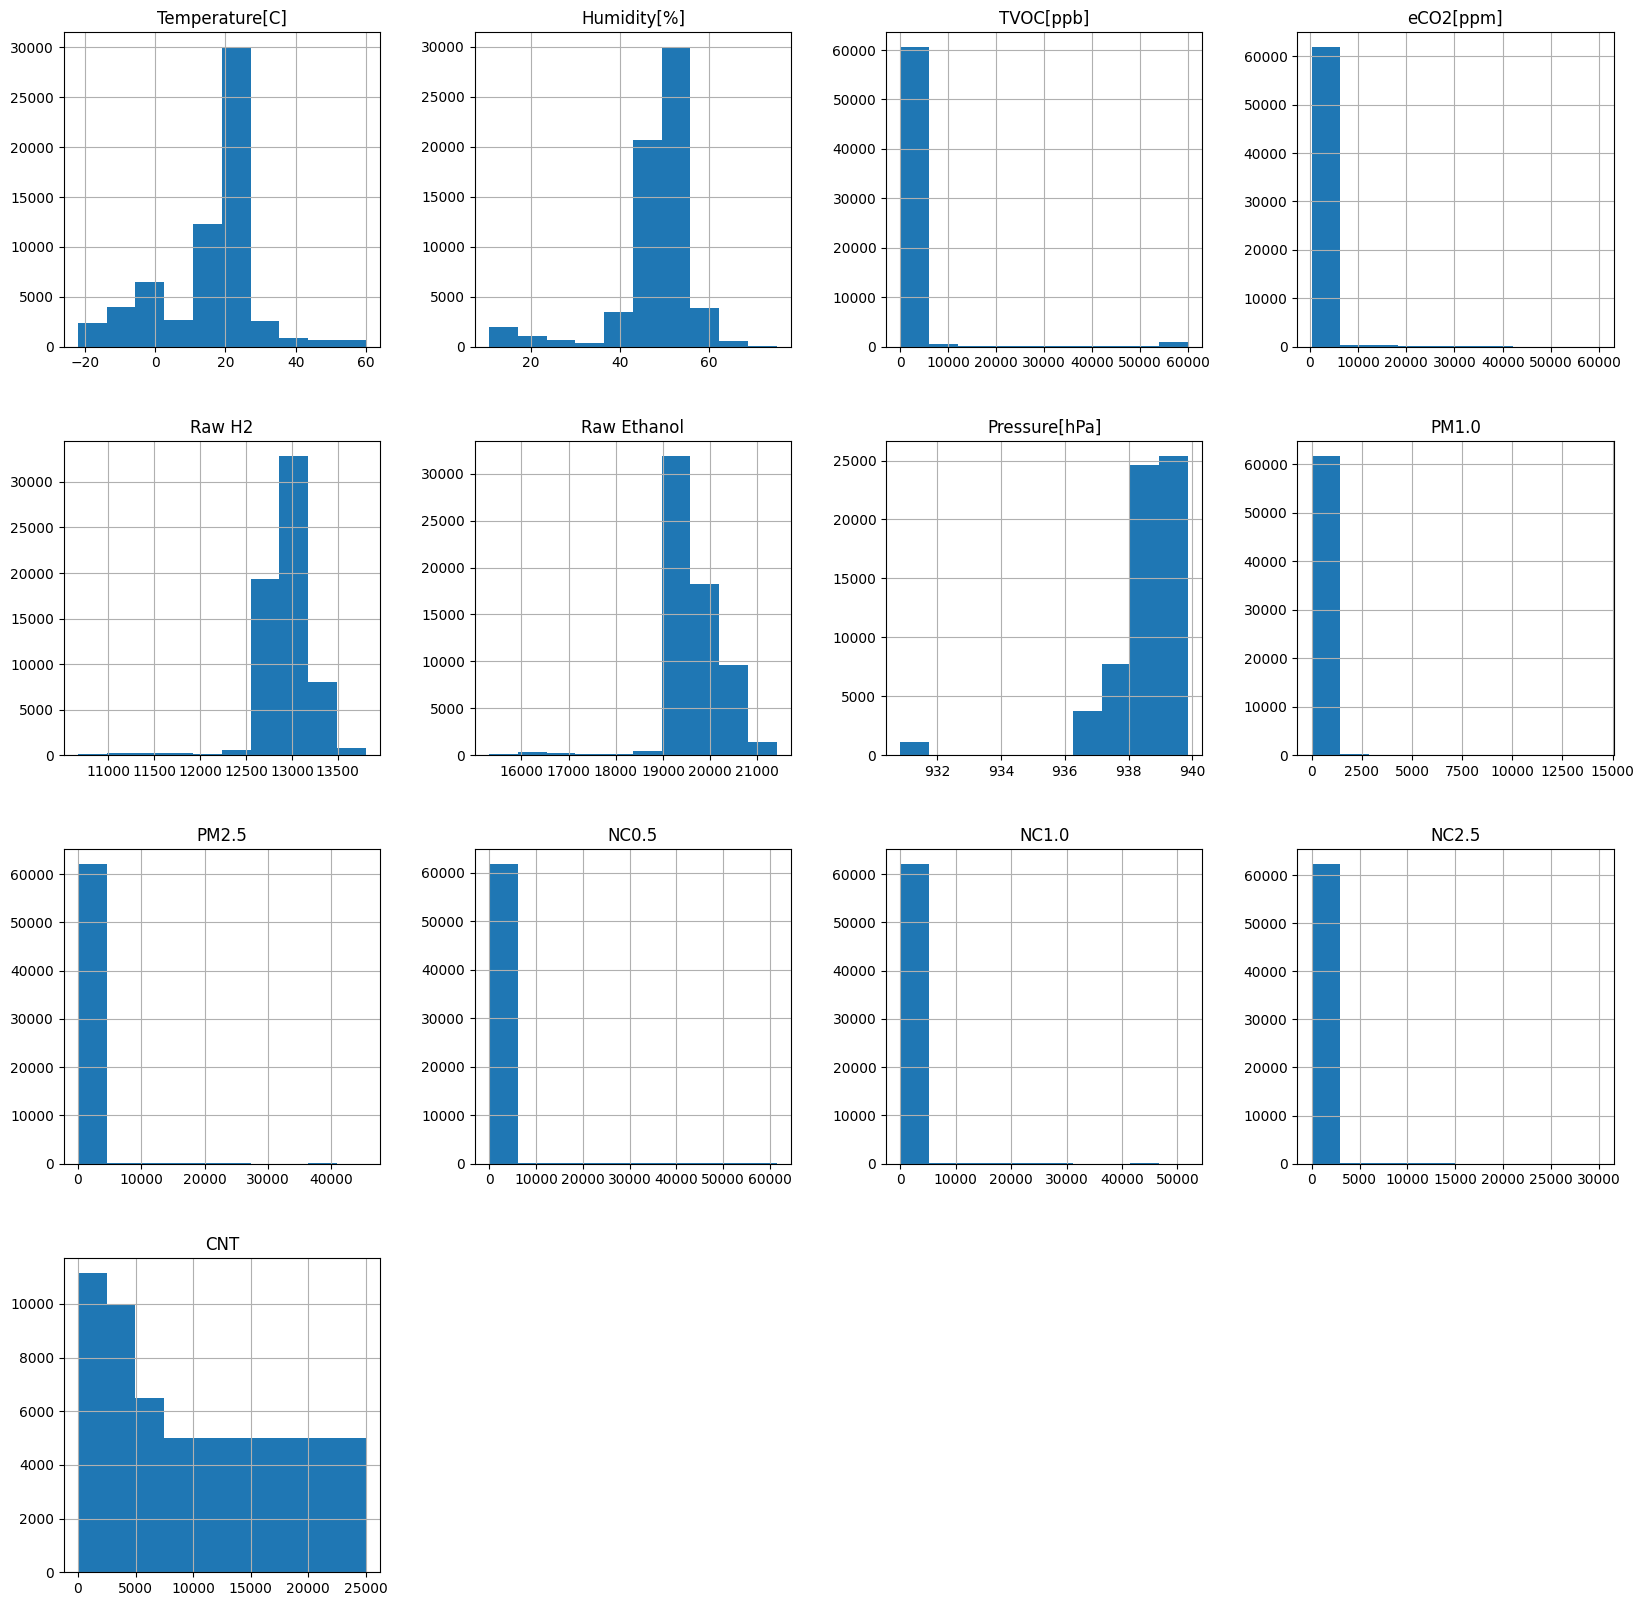

In [20]:
data.hist(figsize=(20,20))

In [21]:
data.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.972252,48.536969,1944.124030,670.574994,12942.383835,19754.257912,938.627644,100.594309,184.443467,491.463608,203.382660,80.049042,10511.386157
std,14.344456,8.851486,7780.803394,1904.714566,272.289864,609.513156,1.330882,922.524245,1971.581818,4265.661251,2210.259493,1083.383189,7597.870997
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.074000,47.540000,132.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.350000,8.820000,1.392000,0.033000,3625.250000
50%,20.108500,50.120000,996.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.945000,0.044000,9336.000000
75%,25.400000,53.240000,1193.000000,439.000000,13108.000000,20078.000000,939.417000,2.090000,2.180000,14.420000,2.253000,0.051000,17164.750000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000


*Correlation matrix **before** deleting outliers*

<function matplotlib.pyplot.show(close=None, block=None)>

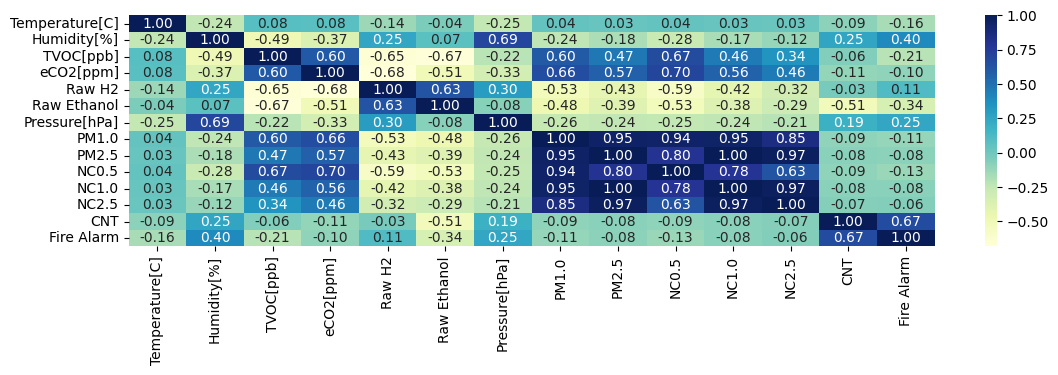

In [22]:
correlation_matrix = data.corr()


plt.figure(figsize=(13,3))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show

Зафиксируем максимимальные существенно коррелирующие с Fire Alarm поля упорядоченные по убыванию корреляции:
- Humidity (0,40)
- Pressure(0,25)

#### Удаление выбросов

Пока что просто передадим на обработку выбросов все числовые признаки

In [23]:
outliers = data.drop(['Fire Alarm'], axis=1)

Q1 = outliers.quantile(0.25)
Q3 = outliers.quantile(0.75)
IQR = Q3-Q1
filtered_data = outliers[~((outliers < (Q1 - 1.5 * IQR)) |(outliers > (Q3 + 1.5 * IQR))).any(axis=1)]


In [24]:
index_list = filtered_data.index.values

In [25]:
filtered_data = data[data.index.isin(index_list)]
filtered_data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
240,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240,False
247,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247,False
248,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248,False
249,23.153,49.85,12.0,400.0,12630.0,19698,939.791,0.10,0.18,0.50,0.195,0.074,249,False
250,23.163,49.71,11.0,400.0,12637.0,19710,939.812,0.10,0.17,0.49,0.192,0.073,250,False


### Смотрим насколько изменилась ситуация после удаления выбросов

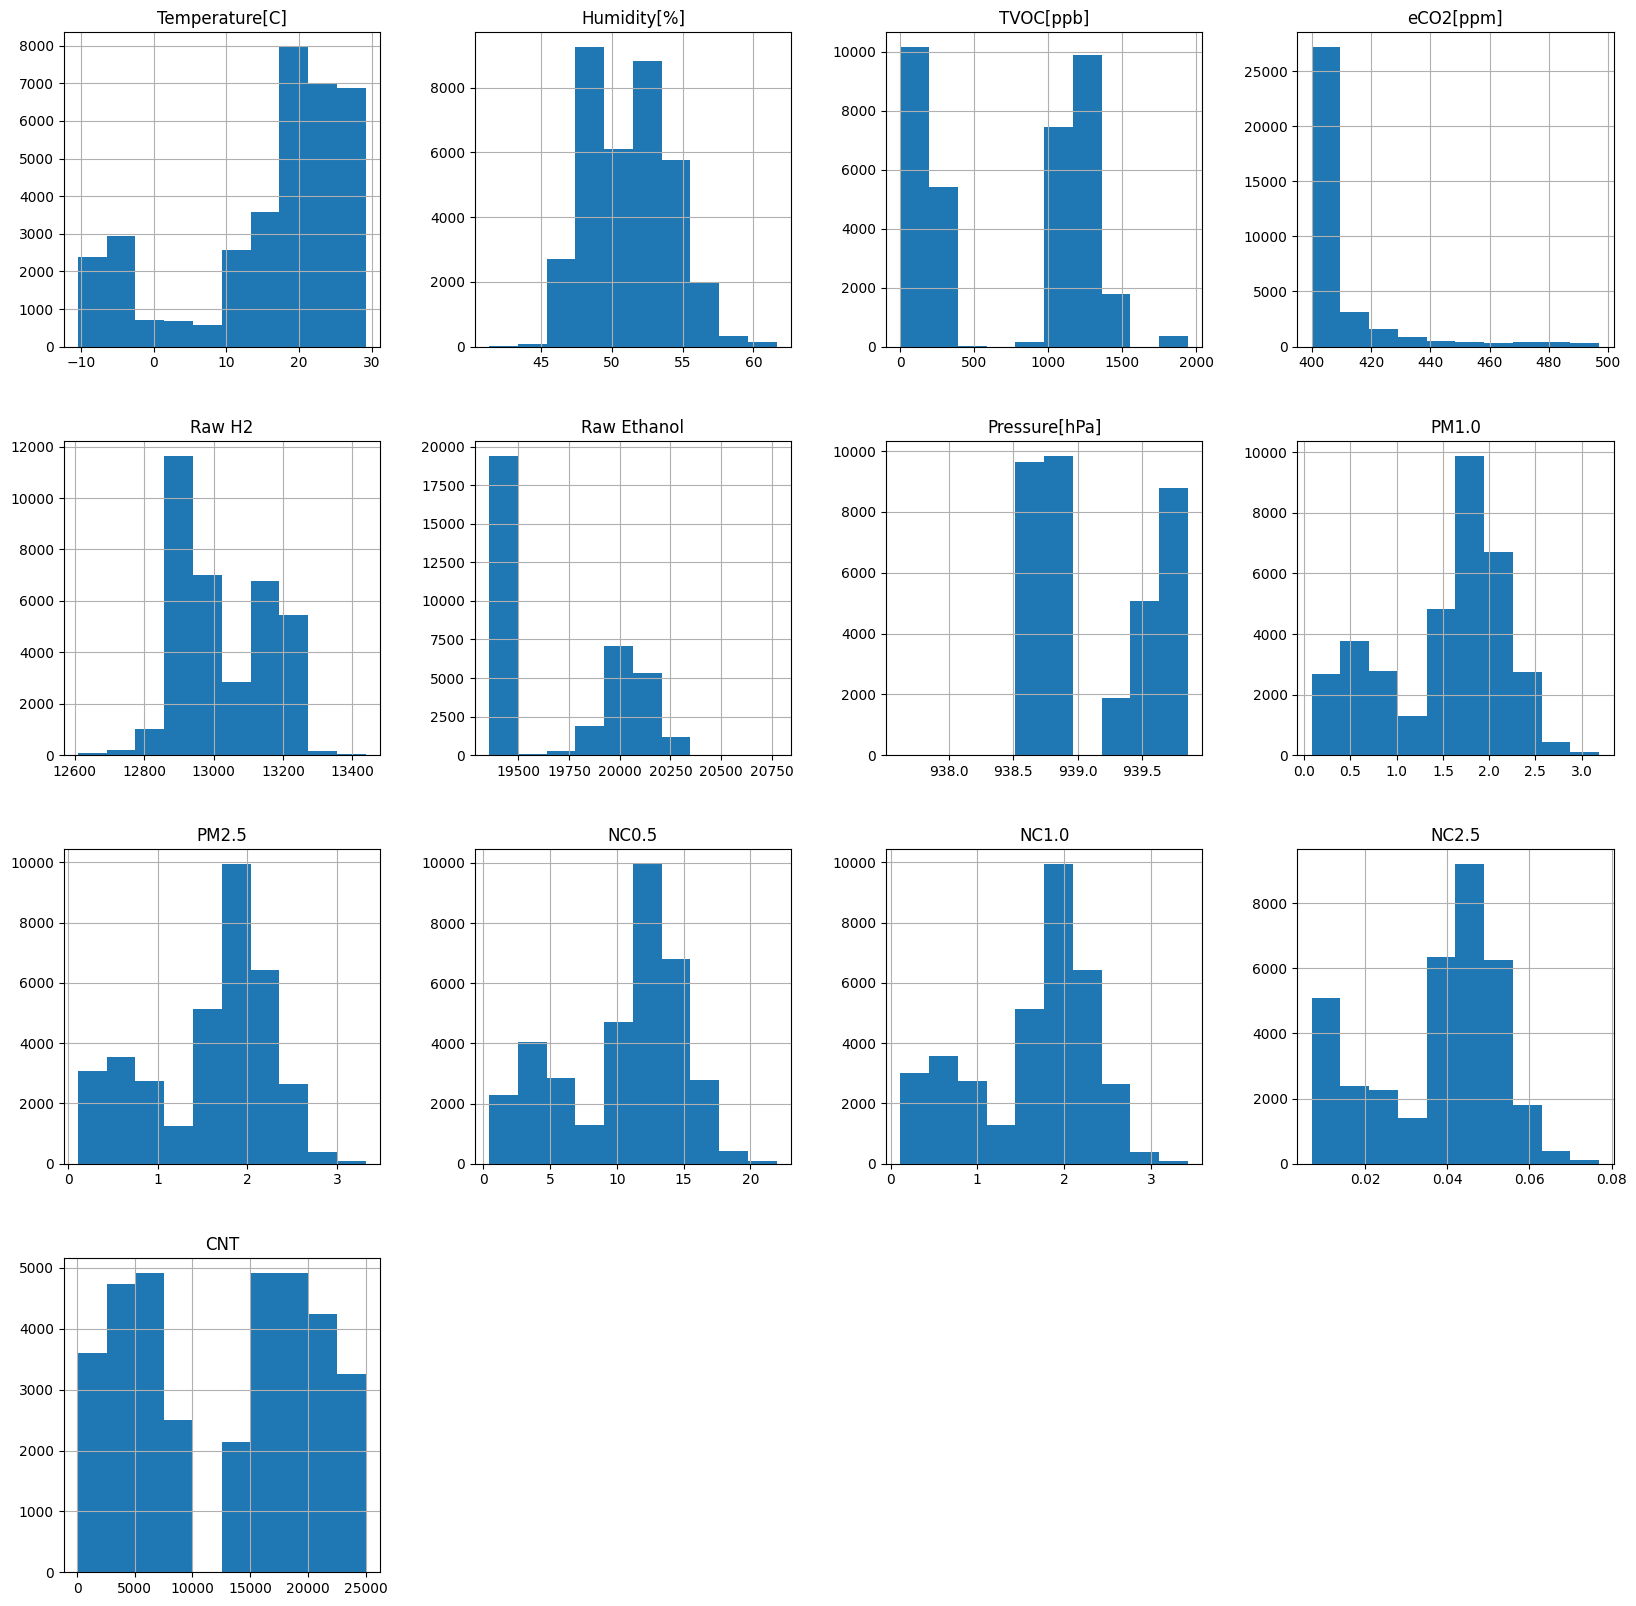

In [26]:
filtered_data.hist(figsize=(20,20));

*Correlation matrix **after** deleting outliers* 

<function matplotlib.pyplot.show(close=None, block=None)>

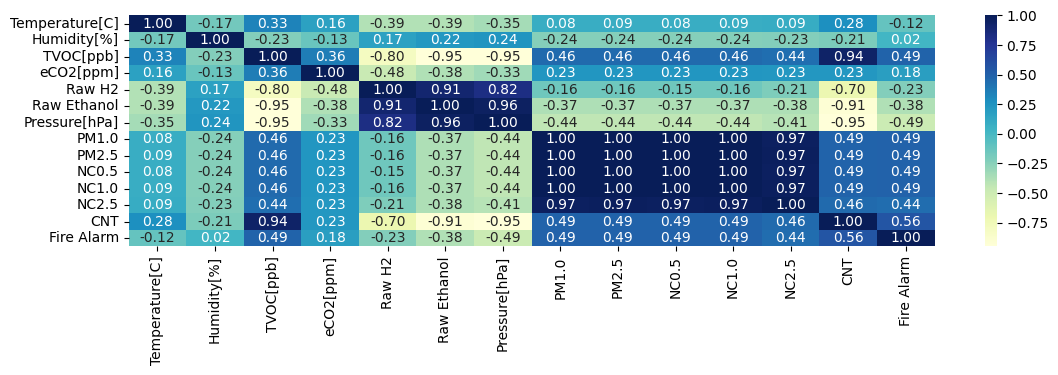

In [27]:
correlation_matrix = filtered_data.corr()


plt.figure(figsize=(13,3))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show

Круто! наблюдаем количественное увеличение **хорошо** коррелириующих признаков, также упорядочим по убыванию:
- TVOC, PM1.0, PM2.5, NC0.5, NC1.0 (0.49)
- NC2.5(0.44)

# Выделение целевого признака. Разбитие выборки.

In [28]:
y = filtered_data['Fire Alarm']
X = filtered_data.drop(['Fire Alarm'], axis=1)

Проверить на дизбаланс

In [29]:
y.value_counts()

True     30419
False     4804
Name: Fire Alarm, dtype: int64

Видим, что у нас очевидный дизбаланс в сторону False

In [30]:
from imblearn.over_sampling import RandomOverSampler 
OverS = RandomOverSampler(random_state=42) 

In [31]:
t = [(d) for d in y if d==0] 
s = [(d) for d in y if d==1] 
print('Before Over-Sampling: ') 
print('Samples in class 0: ',len(t)) 
print('Samples in class 1: ',len(s)) 
  
# Over Sampling Minority class 
OverS = RandomOverSampler(random_state=42) 
  
# Fit predictor (x variable) 
# and target (y variable) using fit_resample() 
X_balanced, y_balanced = OverS.fit_resample(X, y) 
  
# Printing number of samples in 
# each class after Over-Sampling 
t = [(d) for d in y_balanced if d==0] 
s = [(d) for d in y_balanced if d==1] 
print('After Over-Sampling: ') 
print('Samples in class 0: ',len(t)) 
print('Samples in class 1: ',len(s)) 

Before Over-Sampling: 
Samples in class 0:  4804
Samples in class 1:  30419
After Over-Sampling: 
Samples in class 0:  30419
Samples in class 1:  30419


In [32]:
X_balanced.shape

(60838, 13)

In [33]:
X.shape

(35223, 13)

In [34]:
X

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
240,23.056,51.11,1.0,400.0,12626.0,19698,939.810000,0.08,0.14,0.43,0.156,0.056,240
247,23.131,50.08,5.0,400.0,12633.0,19696,939.813000,0.09,0.17,0.46,0.189,0.074,247
248,23.142,50.00,0.0,400.0,12629.0,19704,939.790000,0.10,0.17,0.49,0.189,0.072,248
249,23.153,49.85,12.0,400.0,12630.0,19698,939.791000,0.10,0.18,0.50,0.195,0.074,249
250,23.163,49.71,11.0,400.0,12637.0,19710,939.812000,0.10,0.17,0.49,0.192,0.073,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56967,24.173,44.99,17.0,415.0,12863.0,20774,937.630000,2.18,2.26,15.00,2.340,0.053,81
56968,24.212,45.00,27.0,426.0,12853.0,20763,937.634000,2.18,2.26,15.00,2.339,0.053,82
56971,24.329,42.89,31.0,415.0,12871.0,20756,937.625000,2.15,2.24,14.81,2.310,0.052,85
58472,-5.638,44.80,75.0,400.0,12791.0,20634,938.627644,1.95,2.02,13.40,2.090,0.047,1586


In [35]:
X_balanced

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240
1,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247
2,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248
3,23.153,49.85,12.0,400.0,12630.0,19698,939.791,0.10,0.18,0.50,0.195,0.074,249
4,23.163,49.71,11.0,400.0,12637.0,19710,939.812,0.10,0.17,0.49,0.192,0.073,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60833,18.960,49.95,176.0,400.0,13148.0,20009,939.654,0.72,0.75,4.98,0.777,0.018,3104
60834,17.270,52.67,20.0,400.0,13133.0,20037,939.636,0.82,0.85,5.61,0.875,0.020,2104
60835,26.235,48.84,11.0,400.0,13104.0,19998,939.718,0.57,0.59,3.91,0.609,0.014,1440
60836,22.104,53.28,48.0,400.0,13124.0,20010,939.626,0.68,0.70,4.66,0.727,0.016,2051


Далее будем работать именно с X_balanced, y_balanced

Мастабируем данные

In [36]:
scaler = StandardScaler()


In [37]:
standard_X_balanced = scaler.fit_transform(X_balanced)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(standard_X_balanced, y_balanced, test_size=0.2) 

In [39]:
y_train

30368     True
48321    False
58257    False
43727    False
9261      True
         ...  
40525    False
18953     True
9237      True
41524    False
29598     True
Name: Fire Alarm, Length: 48670, dtype: bool

In [40]:
X_train

array([[ 1.05529264, -1.18667301,  1.44579681, ...,  0.57867918,
         0.50504215,  1.51254056],
       [ 0.7766349 ,  1.12287927, -0.76890751, ..., -0.76592832,
        -0.88943659, -0.81111014],
       [ 0.4275472 , -2.03171327, -0.52101986, ..., -0.51583414,
        -0.635895  , -0.64932253],
       ...,
       [-0.54513014, -1.3651078 ,  1.18343397, ...,  1.36970742,
         1.32905232,  0.91107134],
       [-0.37627318,  0.51014091, -0.81233309, ..., -1.35322815,
        -0.38235341, -0.96731448],
       [ 1.06185444, -1.22707334,  1.23409714, ...,  0.45363209,
         0.37827136,  1.41356461]])

In [41]:
from sklearn.neighbors import KNeighborsClassifier


# KNN

Firstly, we need to find optimal value of n_neighbors

In [42]:
param_grid = {'n_neighbors':[2,3,4,5,6,7,8,9,10,100,1000]}

In [43]:
grid_model = GridSearchCV(KNeighborsClassifier(),
                          param_grid=param_grid,
                         scoring = 'accuracy')

In [44]:
grid_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [ ]:
grid_model.best_params_['n_neighbors']

2

In [ ]:
knn = KNeighborsClassifier(n_neighbors = grid_model.best_params_['n_neighbors'])
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_knn_pred = knn.predict(X_test)
y_knn_pred

array([ True,  True,  True, ..., False, False,  True])

## Метрики качества

*Accuracy*

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_knn_pred)

0.9997534516765286

 *Precision, recall, f1*

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_knn_pred, y_test, average='weighted')

0.9997534521611294

In [ ]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_knn_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6131
        True       1.00      1.00      1.00      6037

    accuracy                           1.00     12168
   macro avg       1.00      1.00      1.00     12168
weighted avg       1.00      1.00      1.00     12168



In [53]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, y_knn_pred)

array([[6131,    0],
       [   3, 6034]])

Видим, что у нас каким-то мистическим образом практически нет неверных ("false") меток 

*ROC AUC score*

In [54]:

from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_knn_pred, pos_label=1)

roc_auc = roc_auc_score(y_test, y_knn_pred) 
roc_auc


0.9997515322179891

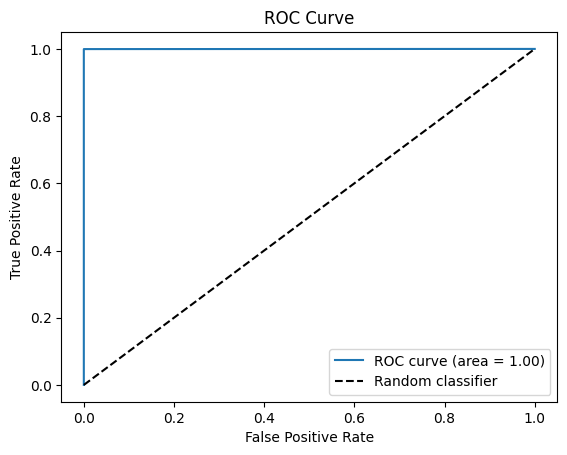

In [55]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

Хм...прям-таки идеальный результат

# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

In [58]:
grid_model = GridSearchCV(GaussianNB(),
                          param_grid=param_grid,
                          scoring = 'accuracy')

In [59]:
grid_model.fit(X_train, y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy')

In [60]:
grid_model.best_estimator_

GaussianNB(var_smoothing=2.848035868435799e-06)

In [61]:
classifier = GaussianNB(var_smoothing=grid_model.best_params_['var_smoothing'])
classifier.fit(X_train, y_train)

GaussianNB(var_smoothing=2.848035868435799e-06)

In [62]:
y_bayes_pred = classifier.predict(X_test)

In [63]:
confusion_matrix(y_test, y_bayes_pred)

array([[6024,  107],
       [ 225, 5812]])

интересно, что без поиска гиперпараметра результат на 2 меньше неправильных прогнозов...получается gridsearch работал неправильно или же зря?

Ура! Оказывается, всё-таки данные никакие не странные, просто KNN метод отлично работает, видимо, для этих данных, здесь видим у нас не всё идеально: 109+8=117 неправильных и 902+8=910 правильных ответов

In [64]:
f1_score(y_test, y_bayes_pred, average='weighted')

0.9727107074967232

In [65]:
accuracy_score(y_test, y_bayes_pred)

0.9727153188691651

In [66]:
print(classification_report(y_test, y_bayes_pred))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97      6131
        True       0.98      0.96      0.97      6037

    accuracy                           0.97     12168
   macro avg       0.97      0.97      0.97     12168
weighted avg       0.97      0.97      0.97     12168



In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_bayes_pred, pos_label=1)

roc_auc = roc_auc_score(y_test, y_knn_pred) 
roc_auc

0.9997515322179891

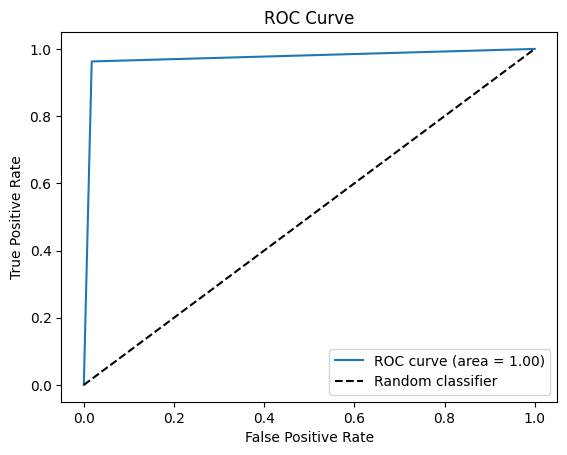

In [68]:
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr  
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression


In [70]:
def metrics(y_test, y_pred):
    print(f'accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))


In [71]:
# Обучение
model = LogisticRegression()
model.fit(X_train, y_train)
y_logisticRegr_pred = model.predict(X_test)

# Оценка модели
metrics(y_test, y_logisticRegr_pred)

accuracy: 0.9992603550295858
ROC AUC: 0.9992634854595217
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6131
        True       1.00      1.00      1.00      6037

    accuracy                           1.00     12168
   macro avg       1.00      1.00      1.00     12168
weighted avg       1.00      1.00      1.00     12168



In [72]:
confusion_matrix(y_test, y_logisticRegr_pred)

array([[6124,    7],
       [   2, 6035]])

# SVM

In [73]:
from sklearn.svm import LinearSVC


In [74]:
param_grid = {'C': [1, 10, 100, 1000], 'max_iter' : [100,1000,10000]}

In [75]:
grid_model = GridSearchCV(LinearSVC(),
                          param_grid=param_grid,
                          scoring = 'accuracy')

In [76]:
grid_model.fit(X_train, y_train)

/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinea

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'max_iter': [100, 1000, 10000]},
             scoring='accuracy')

In [77]:
grid_model.best_params_

{'C': 10, 'max_iter': 10000}

In [78]:
svm = LinearSVC(C=grid_model.best_params_['C'], max_iter = grid_model.best_params_['max_iter'])
svm.fit(X_train, y_train)
y_svm_pred = svm.predict(X_test)


In [79]:
metrics(y_test, y_svm_pred)

accuracy: 0.9999178172255095
ROC AUC: 0.9999171774059963
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6131
        True       1.00      1.00      1.00      6037

    accuracy                           1.00     12168
   macro avg       1.00      1.00      1.00     12168
weighted avg       1.00      1.00      1.00     12168



In [80]:
confusion_matrix(y_test, y_svm_pred)

array([[6131,    0],
       [   1, 6036]])

# Итоговая модель классификаторов

In [81]:
from sklearn.svm import SVC

In [82]:
classifiers = {
    'Linear SVC': SVC(max_iter=1000, C=100, probability=True),
    'KNN classifier': KNeighborsClassifier(n_neighbors = 2),
    'Logistic regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
}

In [83]:
n_classifiers = len(classifiers)

for index, (name, classifier) in enumerate(classifiers.items()):
    print('---------------------------------------------------------')
    print(name)
    classifier.fit(X_train, np.ravel(y_train))

    y_pred = classifier.predict(X_test)
    metrics(y_test, y_pred)

---------------------------------------------------------
Linear SVC


/home/timofey/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


accuracy: 1.0
ROC AUC: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6131
        True       1.00      1.00      1.00      6037

    accuracy                           1.00     12168
   macro avg       1.00      1.00      1.00     12168
weighted avg       1.00      1.00      1.00     12168

---------------------------------------------------------
KNN classifier
accuracy: 0.9997534516765286
ROC AUC: 0.9997515322179891
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6131
        True       1.00      1.00      1.00      6037

    accuracy                           1.00     12168
   macro avg       1.00      1.00      1.00     12168
weighted avg       1.00      1.00      1.00     12168

---------------------------------------------------------
Logistic regression
accuracy: 0.9992603550295858
ROC AUC: 0.9992634854595217
              precision    recall  f1-score   support


# Реализация метрик

In [84]:
def my_accuracy(y_test, y_pred):
    m = confusion_matrix(y_test, y_pred)
    TP, FP = m[0]
    FN, TN = m[1]
    P = TP+FN
    N = TN+FP
    return (TP+TN)/(P+N)
my_accuracy(y_test, y_svm_pred) == accuracy_score(y_test, y_svm_pred)

True

In [85]:
from sklearn.metrics import precision_score
def my_precision(y_test, y_pred):
    m = confusion_matrix(y_test, y_pred)
    TP, FP = m[0]
    FN, TN = m[1]
    P = TP+FN
    N = TN+FP
    return TP/(TP+FP)
my_precision(y_test, y_svm_pred) == precision_score(y_test, y_svm_pred)

True

In [86]:
from sklearn.metrics import recall_score
def my_recall(y_test, y_pred):
    m = confusion_matrix(y_test, y_pred)
    TP, FP = m[0]
    FN, TN = m[1]
    P = TP+FN
    N = TN+FP
    return  TP/P
print(my_recall(y_test, y_svm_pred), recall_score(y_test, y_svm_pred))
round(my_recall(y_test, y_svm_pred),2) == round(recall_score(y_test, y_svm_pred),2)

0.9998369210697978 0.9998343548119927


True

In [87]:
def my_f1(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return 2/(1/precision +1/recall)
print(my_f1(y_test, y_svm_pred) == f1_score(y_test, y_svm_pred))

False


# Реализация KNN

In [88]:
# from sklearn.metrics import accuracy_score
# predictions = []

# for x in range (len(y_test)):
#     print(y_test[x])
#     neighbors = get_neighbors(x_train_concat, y_test[x], k=5)
#     result = prediction(neighbors)
#     predictions.append(result)
    
# print(f'predicted = {result}, actual = {x_test_concat[x][-1]}') # если есть интерес посмотреть, какие конкретно прогнозы некорректны

# accuracy = accuracy_score(x_test_concat, predictions)
# print(f'Accuracy: {accuracy}')

# accuracy_score(y_test, y_svm_pred)

In [100]:
from scipy.stats import mode 

class K_Nearest_Neighbors_Classifier() :  
      
    def __init__( self, K ) : 
          
        self.K = K 
                    
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train 
                    
        self.m, self.n = X_train.shape 
                
    def predict( self, X_test ) : 
          
        self.X_test = X_test 
                    
        self.m_test, self.n = X_test.shape 
                    
        Y_predict = np.zeros( self.m_test ) 
          
        for i in range( self.m_test ) : 
              
            x = self.X_test[i] 
                                          
            neighbors = self.find_neighbors( x ) 
                            
            Y_predict[i] = mode( neighbors )[0][0]     
              
        return Y_predict 
                  
    def find_neighbors( self, x ) : 
          
        euclidean_distances = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
              
            d = self.euclidean( x, self.X_train[i] ) 
              
            euclidean_distances[i] = d 
        
        inds = euclidean_distances.argsort() # берём по порядку от самого маленького до самого большого расстояния по индексам
        Y_train_sorted = self.Y_train[inds]        

        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
              
    def euclidean( self, x, x_train ) : 
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 



In [99]:
# a = numpy.array([10,2,3])
# a.argsort()

array([1, 2, 0])

In [90]:
dict_firealarm = {True: 1, False: 0}
filtered_data["Fire Alarm"] = filtered_data["Fire Alarm"].map(dict_firealarm)
df = filtered_data.head(1000)
  
X = df.iloc[:,:-1].values 
  
Y = df.iloc[:,-1:].values 

/tmp/ipykernel_17294/2063433154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Fire Alarm"] = filtered_data["Fire Alarm"].map(dict_firealarm)


In [92]:
filtered_data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
240,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240,0
247,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247,0
248,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248,0
249,23.153,49.85,12.0,400.0,12630.0,19698,939.791,0.10,0.18,0.50,0.195,0.074,249,0
250,23.163,49.71,11.0,400.0,12637.0,19710,939.812,0.10,0.17,0.49,0.192,0.073,250,0


In [101]:

X = df.iloc[:,:-1].values 
  
Y = df.iloc[:,-1:].values 
      
X_train, X_test, Y_train, Y_test = train_test_split(  
      X, Y, test_size = 1/3, random_state = 0 ) 
      
      
model = K_Nearest_Neighbors_Classifier( K = 3 ) 
      
model.fit( X_train, Y_train ) 
      
model1 = KNeighborsClassifier( n_neighbors = 3 ) 
      
model1.fit( X_train, Y_train ) 
      
  
Y_pred = model.predict( X_test ) 
      
Y_pred1 = model1.predict( X_test ) 
      
      
correctly_classified = 0
      
correctly_classified1 = 0
      
      
count = 0
      
for count in range( np.size( Y_pred ) ) : 
          
        if Y_test[count] == Y_pred[count] : 
              
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] : 
              
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
print( "Accuracy нашей модели       :  ", (  
      correctly_classified / count ) * 100 ) 
print( "Accuracy модели sklearn   :  ", (  
      correctly_classified1 / count ) * 100 ) 

/home/timofey/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/tmp/ipykernel_17294/2046311215.py:31: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  Y_predict[i] = mode( neighbors )[0][0]


Accuracy нашей модели       :   100.0
Accuracy модели sklearn   :   100.0
